In [1]:
using Pkg


In [2]:
Pkg.activate()

 Activating environment at `D:\TANG Yunxi\CodingPrac\JULIA\CMU_Optimal_Control\Project.toml`


In [3]:
using LinearAlgebra
using PyPlot
using SparseArrays

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


In [4]:
# dynamics
h = 0.1   # time step
B = [0.5*h*h; h]
A = I + [0 1; 0 0]*h

2×2 Array{Float64,2}:
 1.0  0.1
 0.0  1.0

In [5]:
nx= 2               # number of states
nu = 1              # number of controls
Tf = 10.0            # final time
N = Int(Tf/h)+1     # number of time steps
times = Array(range(0,Tf, step=h));

In [6]:
x0 = [2.0; 0.0]     # initial state
xs = [0.0; 0.0]     # target state

2-element Array{Float64,1}:
 0.0
 0.0

In [7]:
# Cost weights
Q = sparse(1.0*I(nx))
R = sparse(0.1*I(nu))
Qf = sparse(1.0*I(nx))

2×2 SparseMatrixCSC{Float64,Int64} with 2 stored entries:
  [1, 1]  =  1.0
  [2, 2]  =  1.0

In [8]:
# cost function
function get_J(xhist, uhist)
    cost = 0.5 * xhist[:,end]' * Qf * xhist[:,end]
    for i = 1:(N-1)
        cost = cost + 0.5 * xhist[:,i]' * Q * xhist[:,i] + 0.5 * (uhist[i]' * R * uhist[i])[1]
    end
    return cost
end

get_J (generic function with 1 method)

In [9]:
# get H matrix
H = blockdiag(R, kron(I(N-2), blockdiag(Q, R)), Qf)

300×300 SparseMatrixCSC{Float64,Int64} with 300 stored entries:
  [1  ,   1]  =  0.1
  [2  ,   2]  =  1.0
  [3  ,   3]  =  1.0
  [4  ,   4]  =  0.1
  [5  ,   5]  =  1.0
  [6  ,   6]  =  1.0
  [7  ,   7]  =  0.1
  [8  ,   8]  =  1.0
  [9  ,   9]  =  1.0
  [10 ,  10]  =  0.1
  [11 ,  11]  =  1.0
  [12 ,  12]  =  1.0
  ⋮
  [288, 288]  =  1.0
  [289, 289]  =  0.1
  [290, 290]  =  1.0
  [291, 291]  =  1.0
  [292, 292]  =  0.1
  [293, 293]  =  1.0
  [294, 294]  =  1.0
  [295, 295]  =  0.1
  [296, 296]  =  1.0
  [297, 297]  =  1.0
  [298, 298]  =  0.1
  [299, 299]  =  1.0
  [300, 300]  =  1.0

In [10]:
# Constraints
C = kron(I(N-1), [B -I(nx)])
for k=1:N-2
    C[(k*nx).+(1:nx), (k*(nx+nu)-nx).+(1:nx)] .= A
end
d = [-A*x0;zeros(size(C,1)-nx)]

200-element Array{Float64,1}:
 -2.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

In [11]:
@show size(C)
@show size(d)

size(C) = (200, 300)
size(d) = (200,)


(200,)

In [12]:
y = [H C'; C zeros(size(C,1),size(C,1))] \ [zeros(size(H,1)); d]
# Get state history
z = y[1:size(H,1)]   # states and controls [u0,x1,u1,...,xN]
Z = reshape(z,nx+nu,N-1)
xhist = Z[nu+1:end,:]
xhist = [x0 xhist]

# Get control history
uhist = Z[1,:];

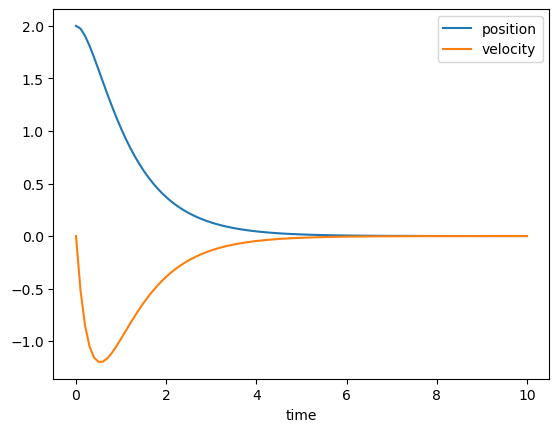

PyObject <matplotlib.legend.Legend object at 0x000000005AEC38B0>

In [13]:
plot(times,xhist[1,:], label="position")
plot(times,xhist[2,:], label="velocity")
xlabel("time")
legend()

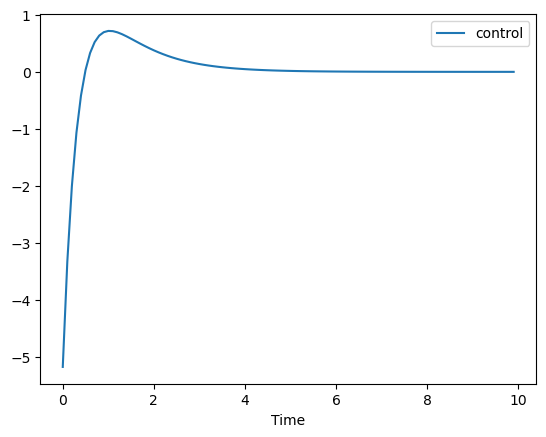

PyObject <matplotlib.legend.Legend object at 0x0000000042976400>

In [14]:
plot(times[1:N-1], uhist, label="control")
xlabel("Time")
legend()

In [15]:
@show get_J(xhist, uhist)

get_J(xhist, uhist) = 26.634448835845248


26.634448835845248